In [62]:
import numpy as np
from collections import Counter

In [107]:
class KNN:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self,X,y):
        self.X_train = X
        self.Y_train = y
        
    def _euclidean_distance(self,x1,x2):  
        #Calculating euclidean distance 
        return np.sqrt(np.sum((x1-x2)**2))
    
    def predict(self,X_predict):   
        #Empty list to store predicted labels 
        y_predict = []
        #We need to predict every value individually
        for x in X_predict:   
            #calculate the euclidean distance between x (with unknown class) 
            #with every training X values (known class) values
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            #argsort will return the indices of smallest values 
            nearest_neighbor_indx =  np.argsort(distances)[:self.k]
            #checking label (class) at that index
            nearest_neighbor_labels = [self.Y_train[label_indx] for label_indx in nearest_neighbor_indx]
            #choose the most common class
            nearest_neighbor = Counter(nearest_neighbor_labels).most_common()[0][0]
            #add the predicted class to the list
            y_predict.append(nearest_neighbor)
        return np.array(y_predict)
    
    def accuracy(self,predictions,targets):
         return (np.sum(np.equal(predictions>0.5,targets)) / len(targets))

        

In [95]:
from sklearn.datasets import load_iris

In [96]:
data = load_iris()
X,y = data.data,data.target

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1234)

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

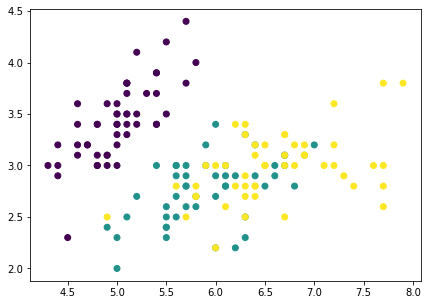

In [100]:
plt.figure(figsize=(7, 5))
ax = plt.scatter(X[:,0],X[:,1],c=y)

In [108]:
model = KNN(k=3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [109]:
model.accuracy(y_test,y_predict)

0.7555555555555555

In [110]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

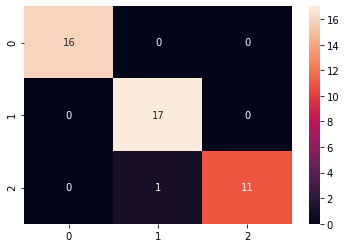

In [111]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

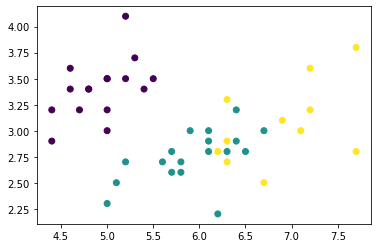

In [112]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_predict)

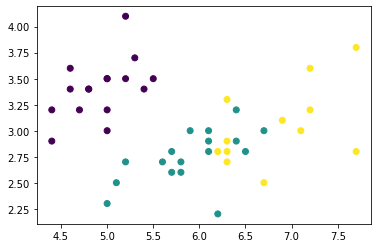

In [92]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)